# Logistic Regression

Logistic regression shares a lot of elements with linear/multi-linear regression. The independent variables, a.k.a. explanatory variables, features or thingy that helps me solve my problem, are the observations or data that you've collected in an experiment, survey, etc...

The main idea of logistic regression is that you want to optimize a function, called a sigmoid function that will best classify your data based on the independent variables of your problem. The dependent variable is simply the categorical variable of interest in your particular problem : type, positive/negative, approved/denied....

We will cover 5 main topics this week :

- Definition and Model Description

- Assumptions and Considerations

- Suitable Research Question

- Case study

- Data Pipeline Implementation

## Definition and Model Description

The definition of a logistic regression model is trying to define the best sigmoid function ($S(x)=\frac{1}{1+e^{-x}}$, $x$ is the equation of a line $x=C + m*x$) that will successfully classify the data into the appropriate category. The way that the model is created is by changing our problem from the sigmoid function, which gives us a probability of the data point belonging to the desired class, to the log(odds) space where it becomes very similar to a linear regression optimisation problem with a few differences. 

This is an iterative process where we :

- We translate our problem from the probability space to the log(odds) space. Using the formula $log(\frac{p}{1-p})=log(odds)$. What does this look like ? What is the probability 0.5 to 1 map to in the log(odds) space ? What is the probability 0 to 0.5 map to in the log(odds) space ?

- Draw a line on the log(odds space)

- Project the data points onto the line. This allows us to compute the log(odds) value for each point

- We then go back to the probability space. Using the formula $p=\frac{e^{log(odds)}}{1+e^{log(odds)}}$

- We calculate the log-likelihood for that particular line

- We rotate the line, project the points, make the conversion from log(odds) to probability, calculate the log likelihood. Rinse and repeat.

Now that we have our line fitted onto our data, we need to know how good this line will be at predicting the outcome variable. For that we need :

- $R^2$ : There are several ways to calculate this for logistic regression. We will look at one of the more common ways McFadden's Pseudo $R^2$ value (it is the one used by statsmodel's logistic regression function).

- p-value : Tells us if the results are statistically significant We want this to be small.

We want something that's similar to what we had with linear regression, but we can't use residuals because they are infinite....

$$R^2 = \frac{LL(overall probability)-LL(fit)}{LL(overall probability)}$$ where :

- LL(overall probability) : the total number of cases with the desired class in our output variable, divided by the total number of cases that don't have the desired class.

- LL(fit) : log-likelihood for the best fitted line.

*

*

*

*

*

We also need a p-value to know that the relationship we got is statistically signicant. Luckily this is pretty straightforward.

$$Chi-squared=2(LL(fit)-LL(overall probability))$$ where :

- LL(fit) and LL(overall probability) are the same as for $R^2$

The Chi-squared value if then plotted onto a chi-squared distribution with the proper number of parameters for the model. How many parameters does the model have ? How many paramters in LL(fit) and how many in LL(overall probability) ?

With our Chi-square value, we can simply compute the p-value for that particular Chi-squared value and we're done !

*

## Assumptions when dealing with a logistic regression problem :

- Binary logistic regression requires the dependent variable to be binary.

- For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome, i.e. approved, positive, yes, etc...

- Only the meaningful variables should be included (good correlation between independent variable and dependent variable).

- The independent variables should be independent of each other. That is, the model should have little or no multicollinearity.

- Logistic regression requires large sample sizes.

- Logistic regression requires balanced classes.

You must check that these assumptions are true before you building your model. 

## Suitable research question :

Logistic regression is a valid method only if : 

- The outcome variable is a categorical variable (1/0, yes/no, approved/denied etc...)

- The independent variables should be independent of each other. That is, the model should have little or no multicollinearity.

## Case study :

Let's look at an example of predicting a subscription to a bank service from this [article](https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

#Import the data
df = pd.read_csv('bank.csv')
df.dropna(inplace=True)

df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
5,30,management,divorced,basic.4y,no,yes,no,cellular,jul,tue,...,8,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,0
6,37,blue-collar,married,basic.4y,no,yes,no,cellular,may,thu,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.327,5099.1,0
7,39,blue-collar,divorced,basic.9y,no,yes,no,cellular,may,fri,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
8,36,admin.,married,university.degree,no,no,no,cellular,jun,mon,...,1,3,1,success,-2.9,92.963,-40.8,1.266,5076.2,1
9,27,blue-collar,single,basic.4y,no,yes,no,cellular,apr,thu,...,2,999,1,failure,-1.8,93.075,-47.1,1.410,5099.1,0


In [2]:
# Let's look at the types and values we have :
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [3]:
#Unique values in the data
df.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp_var_rate        10
cons_price_idx      26
cons_conf_idx       26
euribor3m          316
nr_employed         11
y                    2
dtype: int64

In [4]:
#We replace basic.** from the education column to basic :
df['education']=np.where(df['education'] =='basic.9y', 'Basic', df['education'])
df['education']=np.where(df['education'] =='basic.6y', 'Basic', df['education'])
df['education']=np.where(df['education'] =='basic.4y', 'Basic', df['education'])

In [5]:
#Let's check out the different jobs :
df.job.unique()

array(['blue-collar', 'technician', 'management', 'services', 'retired',
       'admin.', 'housemaid', 'unemployed', 'entrepreneur',
       'self-employed', 'unknown', 'student'], dtype=object)

In [6]:
#Let's check out the poutcome columns :
df.poutcome.unique()

array(['nonexistent', 'success', 'failure'], dtype=object)

In [7]:
#Let's check the different classes for education :
df.education.unique()

array(['Basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

In [8]:
#Let's see how many different samples we have for each of the classes in the output variable :
df['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [9]:
#Let's look at the percentage of each class :
total = sum(df['y'].value_counts())
no_sub = df['y'].value_counts()[0]
sub = df['y'].value_counts()[1]

print("Percent with no subscription :", no_sub/total*100)
print("Percent with subscription :", sub/total*100)

Percent with no subscription : 88.73458288821988
Percent with subscription : 11.265417111780131


To deal with the class imbalance we will use the library imblearn.

You can use the following command to install it :

!pip3 install imblearn

Note: if you're using a Jupyter Notebook you may get (a fairly long and ugly) error, so you may need to restart your kernel an rerun the code to fix it.

In [10]:
#Let's look at the average values for each category :
df.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [11]:
#Let's look at the mean values for our columns based on jobs :
df.groupby('job').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.129726
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286


In [12]:
#Let's look at the mean values for our columns based on marital :
df.groupby('marital').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,,
divorced,44.899393,253.790330,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643,0.103209
married,42.307165,257.438623,2.57281,967.247673,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772,0.101573
single,33.158714,261.524378,2.53380,949.909578,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265,0.140041
unknown,40.275000,312.725000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313038,5157.393750,0.150000


In [13]:
#Let's look at the mean values for our columns based on education :
df.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,,
Basic,42.163910,263.043874,2.559498,974.877967,0.141053,0.191329,93.639933,-40.927595,3.729654,5172.014113,0.087029
high.school,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.108355
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
professional.course,40.080107,252.533855,2.586115,960.765974,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979,0.113485
university.degree,38.879191,253.223373,2.563527,951.807692,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298,0.137245
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509,0.145003


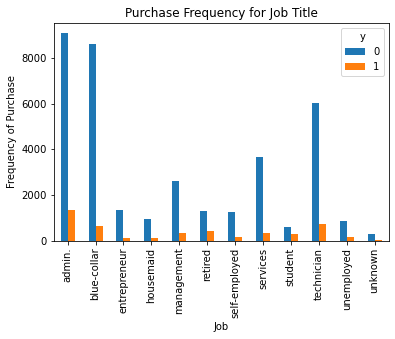

In [14]:
#Let's take a look at the job category :
%matplotlib inline
pd.crosstab(df.job,df.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

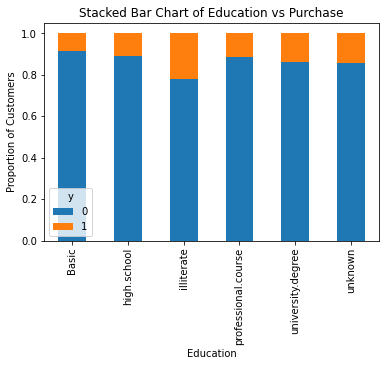

In [15]:
#The Education feature might be helpful :
table=pd.crosstab(df.education,df.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.savefig('edu_vs_pur_stack')

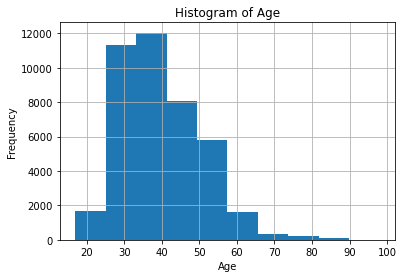

In [16]:
#Let's look at the age distribution of the customers :
df.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')


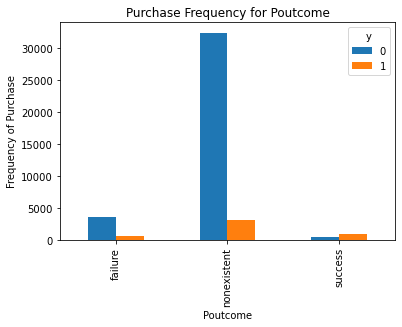

In [17]:
#Poutcome seems like a good predictor :
pd.crosstab(df.poutcome,df.y).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_pout_bar')

### Let's create some dummy variables for our different categories 

In [18]:
#We extract the categorical columns :
cat_vars = df.select_dtypes(include=['object']).columns

#We create the dummy variables (values are 1 or 0)
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df[var], prefix=var)
    data1=df.join(cat_list)
    df=data1
    
#We select the variables we will keep
data_vars=df.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [19]:
#We get all of the variables we will have in our model :
data_final=df[to_keep]
data_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',

In [20]:
#Let's now get our independent variables and dependent variable :
X = data_final.drop('y', axis=1)
y = data_final.y

#We create a SMOTE object with a fixed random state for consistent results :
os = SMOTE(random_state=0)

#We perform our train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#We fit the SMOTE object on our X_train, y_train data :
os_data_X,os_data_y=os.fit_sample(X_train, y_train)

#...and create the output DataFrames with our data :
os_data_X = pd.DataFrame(data=os_data_X, columns=X_train.columns )
os_data_y= pd.DataFrame(data=os_data_y, columns=['y'])

AttributeError: 'SMOTE' object has no attribute 'fit_sample'

In [ ]:
# we can check the numbers of our data
print("Length of oversampled data is ",len(os_data_X))
subs, no_subs = os_data_y.y.value_counts()

print("Number of no subscription in oversampled data:", subs)

print("Number of subscription:", no_subs)

print("Proportion of no subscription data in oversampled data is ",subs/len(os_data_X))

print("Proportion of subscription data in oversampled data is ",no_subs/len(os_data_X))

Length of oversampled data is  51134
Number of no subscription in oversampled data: 25567
Number of subscription: 25567
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


### Feature selection : we can do a recursive feature elimination

In [ ]:
# data_final_vars=data_final.columns.values.tolist()

#Create our logistic regression object :
logreg = LogisticRegression()

#We do recursive feature selection :
rfe = RFE(estimator=logreg, n_features_to_select=20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())

#Let's look at the support and the ranking for the features :
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False False False False False
 False False False False False False False False False False  True  True
  True  True  True  True False  True  True  True False False False  True
  True  True  True  True  True False False False False False False False
 False False False False False  True  True  True  True  True False False
 False]
[37 38 31 40 33 35 28 32 36 34 15  8  9 10 14 19 13 12 18 11 17 16  1  1
  1  1  1  1 41  1  1  1  3  2 42  1  1  1  1  1  1  5  4 24 20 29 22 25
 30 23 21 39 27  1  1  1  1  1  7  6 26]


In [ ]:
#Based on the selection of features, we extract the proper columns :
from itertools import compress

cols = X_train.columns.tolist()
selected_features = list(compress(cols, rfe.support_))

In [ ]:
#We create a subset with only those features :
X = os_data_X[selected_features]
y = os_data_y['y']

#Let's check our data dimensions :
print(X.shape)

(51134, 20)


In [ ]:
#Now we can finally perform logistic regression :
import statsmodels.api as sm

#Create the model on our training data :
logit_model=sm.Logit(y,X)

#Fit the model :
result=logit_model.fit()

#Get our neat little table with the results from the regression :
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.457968
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                51134
Model:                          Logit   Df Residuals:                    51115
Method:                           MLE   Df Model:                           18
Date:                Wed, 20 May 2020   Pseudo R-squ.:                  0.3393
Time:                        19:51:45   Log-Likelihood:                -23418.
converged:                       True   LL-Null:                       -35443.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
marital_divorced                  0.2580      0.059      4.389      0.

In [ ]:
red_features = ['marital_divorced', 
              'marital_married', 
              'marital_single', 
              'education_Basic', 
              'education_high.school',
              'education_professional.course',
              'education_university.degree',
              'education_unknown',
              'housing_no',
              'housing_yes',
              'loan_no',
              'loan_yes',
              'day_of_week_fri',
              'day_of_week_mon',
              'day_of_week_thu',
              'day_of_week_tue',
              'day_of_week_wed']

In [ ]:
#With the insignificant features removed, we refit the model :
X = os_data_X[red_features]
y = os_data_y['y']

#Create the model on our training data :
logit_model=sm.Logit(y,X)

#Fit the model :
result=logit_model.fit()

#Get our neat little table with the results from the regression :
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.459275
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                51134
Model:                          Logit   Df Residuals:                    51117
Method:                           MLE   Df Model:                           16
Date:                Wed, 20 May 2020   Pseudo R-squ.:                  0.3374
Time:                        19:55:28   Log-Likelihood:                -23485.
converged:                       True   LL-Null:                       -35443.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
marital_divorced                  0.2736      0.059      4.658      0.

## We can of course perform the same task using sklearn library 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#Split our data into train,test :
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#Create our logistic regression model and fit it on the data :
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#Let's check the accuracy of our model :
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.92


### We can use the confusion matrix to visualize how our data was classified

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

pd.DataFrame(confusion_matrix, index=['Positive', 'Negative'], columns=['Positive','Negative'])

,Positive,Negative
Positive,7639,27
Negative,1139,6536


*

*

*

*

*

The precision is the ability of the classifier to not label a sample as positive if it is negative. Decribed by the ratio $\frac{tp}{tp + fp}$ where : 
- tp is the number of true positives 
- fp the number of false positives. .

The recall is the ability of the classifier to find all the positive samples. Described by the ratio $\frac{tp}{tp + fn}$ where :
- tp is the number of true positives 
- fn the number of false negatives. 

allows a model to be evaluated taking both the precision and recall into account using a single score, which is helpful when describing the performance of the model and in comparing models. The F-beta score reaches its best value at 1 and worst score at 0.

The support is the number of occurrences of each class in y_test.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      7666
           1       1.00      0.85      0.92      7675

    accuracy                           0.92     15341
   macro avg       0.93      0.92      0.92     15341
weighted avg       0.93      0.92      0.92     15341



## Another helpful way to visualize the results from our logistic regression is using an ROC curve (receiver operating characteristic)

This is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier. We want our curve to be toward the top-left corner.

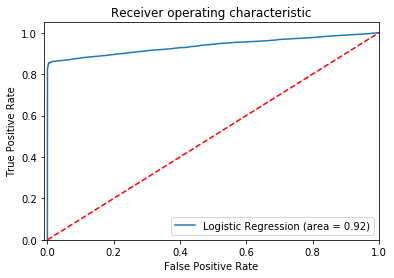

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

#We calculate the roc auc
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))

#We create the roc curve
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

#We plot the curve and the score :
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)

#Plot the random guess classifier performance
plt.plot([0, 1], [0, 1],'r--')

#Set x, y limits, labels, titles and legend :
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

#If you need to save the figure for later user (final report perhaps) :
plt.savefig('Log_ROC')

plt.show()

In [ ]:
# Create a dataframe to store all of our metrics for the models
evaluation = pd.DataFrame({'Model': [],
                           'Root Mean Squared Error (RMSE)':[],
                           'R-squared (training)':[],
                           'Adjusted R-squared (training)':[],
                           'R-squared (test)':[],
                           'Adjusted R-squared (test)':[],
                           '5-Fold Cross Validation':[]})

df.columns

### Let's check our assumptions first :

- There is a linear relationship between the independent variables and the outcome/dependent variable.

- The independent variables are not colinear, i.e. aren’t too highly correlated with each other.

- The observations for the dependent variable are selected independently and at random.

- The residuals are normally distributed.

In [ ]:
# If we have a few features we can use a seaborn's pairplot :
sns.pairplot(df)

In [ ]:
#We can drop sqft_lot and sqft_lot15 :
red_df = df.drop(['sqft_lot', 'sqft_lot15'], axis=1)
red_df

In [ ]:
#Let's look at the correlation between variables :
f, ax = plt.subplots(figsize=(16, 12))
plt.title("Pearson's Correlation Matrix")

sns.heatmap(red_df.corr(), cmap="BuGn", linewidths=0.25, linecolor='w', vmax = 0.8, annot=True)

In [ ]:
# We know that we can drop either sqft_above or sqft_living :
red_df = red_df.drop('sqft_above', axis=1)
red_df

In [ ]:
#Naive implementation, using our domain knowledge :
train_data,test_data = train_test_split(df, train_size = 0.7, random_state=1)

# We select some features we think are important :
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode']

#We create our regression model
reg_model_1 = linear_model.LinearRegression()

#We fit the data :
reg_model_1.fit(train_data[features],train_data['price'])

#Let's look at our values for the intercept and the coefficients :
print('Intercept: {}'.format(reg_model_1.intercept_))
print('Coefficients: {}'.format(reg_model_1.coef_))

#Let's define our own adjusted R-squared function :
def adjustedR2(r2,n,k):
    return r2-(k-1)/(n-k)*(1-r2)

In [ ]:
#Let's calculate the Root Mean Squared Error on the test data
pred = reg_model_1.predict(test_data[features])

rmse = float(format(np.sqrt(metrics.mean_squared_error(test_data['price'],pred)),'.3f'))

#Let's calculate the R-squared value for the training data set :
rtr = float(format(reg_model_1.score(train_data[features],train_data['price']),'.3f'))

#Let's calculate the adjusted R-squared value for the training data set :
artr = float(format(adjustedR2(reg_model_1.score(train_data[features],train_data['price']),train_data.shape[0],len(features)),'.3f'))

#Let's calculate the R-squared value for the test data set :
rte = float(format(reg_model_1.score(test_data[features],test_data['price']),'.3f'))

#Let's calculate theadjusted R-squared value for the test data set :
arte = float(format(adjustedR2(reg_model_1.score(test_data[features],test_data['price']),test_data.shape[0],len(features)),'.3f'))

#For good measure we'll throw in cross-validation as well :
cv = float(format(cross_val_score(reg_model_1,df[features],df['price'],cv=5).mean(),'.3f'))

In [ ]:
r = evaluation.shape[0]
evaluation.loc[r] = ['Prior knowledge selected features',rmse,rtr,artr,rte,arte,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

In [ ]:
#Let's now use the variables that we selected :
train_data_red, test_data_red = train_test_split(red_df, train_size = 0.7, random_state=1)

#We create our regression model
reg_model_2 = linear_model.LinearRegression()

#We fit the data :
reg_model_2.fit(train_data_red.drop('price', axis=1), train_data_red['price'])

#Let's look at our values for the intercept and the coefficients :
print('Intercept: {}'.format(reg_model_2.intercept_))
print('Coefficients: {}'.format(reg_model_2.coef_))

In [ ]:
#Let's calculate the Root Mean Squared Error on the test data
pred2 = reg_model_2.predict(test_data_red.drop('price', axis=1))

#Let's calculate the R-squared value for the training data set :
rmse2 = float(format(np.sqrt(metrics.mean_squared_error(test_data_red['price'],pred2)),'.3f'))

#Let's calculate the R-squared value for the training data set :
rtr2 = float(format(reg_model_2.score(train_data_red.drop('price', axis=1),train_data['price']),'.3f'))

#Let's calculate the adjusted R-squared value for the training data set :
artr2 = float(format(adjustedR2(reg_model_2.score(train_data_red.drop('price', axis=1),train_data['price']),train_data_red.drop('price', axis=1).shape[0],len(train_data_red.drop('price', axis=1).columns)),'.3f'))

#Let's calculate the R-squared value for the test data set :
rte2 = float(format(reg_model_2.score(test_data_red.drop('price', axis=1),test_data_red['price']),'.3f'))

#Let's calculate theadjusted R-squared value for the test data set :
arte2 = float(format(adjustedR2(reg_model_2.score(test_data_red.drop('price', axis=1),test_data_red['price']),test_data_red.drop('price', axis=1).shape[0],len(test_data_red.drop('price', axis=1).columns)),'.3f'))

#For good measure we'll throw in cross-validation as well :
cv2 = float(format(cross_val_score(reg_model_2,test_data_red.drop('price', axis=1),test_data_red['price'],cv=5).mean(),'.3f'))

In [ ]:
r = evaluation.shape[0]
evaluation.loc[r] = ['Filter selected features',rmse2,rtr2,artr2,rte2,arte2,cv2]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

In [ ]:
#Let's now use the variables that we selected :
train_data_red, test_data_red = train_test_split(df, train_size = 0.7, random_state=1)

#We create our regression model
reg_model_3 = linear_model.LinearRegression()

#We fit the data :
reg_model_3.fit(train_data_red.drop('price', axis=1), train_data_red['price'])

#Let's look at our values for the intercept and the coefficients :
print('Intercept: {}'.format(reg_model_2.intercept_))
print('Coefficients: {}'.format(reg_model_2.coef_))

In [ ]:
#Let's calculate the Root Mean Squared Error on the test data
pred3 = reg_model_3.predict(test_data_red.drop('price', axis=1))

#Let's calculate the R-squared value for the training data set :
rmse3 = float(format(np.sqrt(metrics.mean_squared_error(test_data_red['price'],pred3)),'.3f'))

#Let's calculate the R-squared value for the training data set :
rtr3 = float(format(reg_model_3.score(train_data_red.drop('price', axis=1),train_data['price']),'.3f'))

#Let's calculate the adjusted R-squared value for the training data set :
artr3 = float(format(adjustedR2(reg_model_3.score(train_data_red.drop('price', axis=1),train_data['price']),train_data_red.drop('price', axis=1).shape[0],len(train_data_red.drop('price', axis=1).columns)),'.3f'))

#Let's calculate the R-squared value for the test data set :
rte3 = float(format(reg_model_3.score(test_data_red.drop('price', axis=1),test_data_red['price']),'.3f'))

#Let's calculate theadjusted R-squared value for the test data set :
arte3 = float(format(adjustedR2(reg_model_3.score(test_data_red.drop('price', axis=1),test_data_red['price']),test_data_red.drop('price', axis=1).shape[0],len(test_data_red.drop('price', axis=1).columns)),'.3f'))

#For good measure we'll throw in cross-validation as well :
cv3 = float(format(cross_val_score(reg_model_3,test_data_red.drop('price', axis=1),test_data_red['price'],cv=5).mean(),'.3f'))

In [ ]:
r = evaluation.shape[0]
evaluation.loc[r] = ['Every feature',rmse3,rtr3,artr3,rte3,arte3,cv3]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

## Polynomial regression :

Once again linear models, we want to fit a straight line on the data. However, sometimes the data has a quadratic distribution, creating a quadratic function and applying a polynomial transformation might be a good way to go. This time the hypothesis function is defined as

$$h_{\theta}(X)={\theta}_0+{\theta}_1x+{\theta}_2x^2+...+{\theta}_nx^n$$
 

We should be very careful when choosing the degree of our terms because it migh cause overfitting. 

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

#Naive implementation, using our domain knowledge :
train_data,test_data = train_test_split(df, train_size = 0.7, random_state=1)

# We select some features we think are important :
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode']

# We create a polynomial regression object
polyfeat = PolynomialFeatures(degree=2)

# Fit our model onto the data :
X_everything = polyfeat.fit_transform(df[features])
X_trpoly = polyfeat.fit_transform(train_data[features])
X_tepoly = polyfeat.fit_transform(test_data[features])
poly = linear_model.LinearRegression().fit(X_trpoly, train_data['price'])

pred1 = poly.predict(X_tepoly)
rmsepoly1 = float(format(np.sqrt(metrics.mean_squared_error(test_data['price'],pred1)),'.3f'))
rtrpoly1 = float(format(poly.score(X_trpoly,train_data['price']),'.3f'))
rtepoly1 = float(format(poly.score(X_tepoly,test_data['price']),'.3f'))
cv1 = float(format(cross_val_score(linear_model.LinearRegression(),X_everything,df['price'],cv=5).mean(),'.3f'))


r = evaluation.shape[0]
evaluation.loc[r] = ['Polynomial Regression degree=2 prior knowledge selected features',
                          rmsepoly1, rtrpoly1,'-',rtepoly1,'-',cv1]

In [ ]:
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

### Last but not least, we can also do everything we did, with some additional features, using statsmodels package 

In [ ]:
import statsmodels.api as sm
from sklearn import datasets 

data = datasets.load_boston()

df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

In [ ]:
import numpy as np
import pandas as pd

# Put the target (housing value -- MEDV) in another DataFrame
target = pd.DataFrame(data.target, columns=["MEDV"])

In [ ]:
## Without a constant

import statsmodels.api as sm

X = df["RM"] ## X usually means our input variables (or independent variables)
y = target["MEDV"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

## Data pipeline implementation will be the homework ! :)

# Additional ressources :

Great website with an interactive window for neural networks found [here](http://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.81123&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false). For those of you who are planning on doing your projects with some machine learning in it, you might find the website helpful for a demonstration.

In [ ]:
#Let's do our train-test split :
train_data,test_data = train_test_split(df,train_size = 0.8,random_state=3)

X_train = np.array(train_data['sqft_living'], dtype=pd.Series).reshape(-1,1)
y_train = np.array(train_data['price'], dtype=pd.Series)

X_test = np.array(test_data['sqft_living'], dtype=pd.Series).reshape(-1,1)
y_test = np.array(test_data['price'], dtype=pd.Series)

In [ ]:
# We then create our linear regression object :
lr = linear_model.LinearRegression()

# and fit our model :
lr.fit(X_train,y_train)

In [ ]:
# We can now calculate our different metrics to know how good our model is :
pred = lr.predict(X_test)

rmse = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f'))
rtrsm = float(format(lr.score(X_train, y_train),'.3f'))
rtesm = float(format(lr.score(X_test, y_test),'.3f'))
cv = float(format(cross_val_score(lr,df[['sqft_living']],df['price'],cv=5).mean(),'.3f'))

print ("Average Price for Test Data: {:.3f}".format(y_test.mean()))
print('Intercept: {}'.format(lr.intercept_))
print('Coefficient: {}'.format(lr.coef_))

In [ ]:
#Let's look at our simple model :
plt.figure()
plt.scatter(X_test,y_test,color='blue',label="Data", alpha=.2)
plt.plot(X_test,lr.predict(X_test),color="red",label="Regression Line")
plt.xlabel("Living Space (sqft)", fontsize=15)
plt.ylabel("Price ($)", fontsize=15)
plt.legend()